## Classification Analysis to predict car body style based on gender

In [ ]:
import pandas as pd

# Load the uploaded Excel file
excel_path = "Car-Sales-Trend_DS7/data/raw/Car Sales.xlsx - car_data.csv"

try:
    # Attempt to load it as an Excel file first
    df = pd.read_excel(excel_path)
except:
    # If it fails, try loading as a CSV (in case of incorrect extension)
    df = pd.read_csv(excel_path)

df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Select relevant columns
df_model = df[['Gender', 'Body Style']].dropna()

# Step 2: Encode Gender and Body Style
le_gender = LabelEncoder()
le_body_style = LabelEncoder()

df_model['Gender_encoded'] = le_gender.fit_transform(df_model['Gender'])
df_model['Body_Style_encoded'] = le_body_style.fit_transform(df_model['Body Style'])

# Step 3: Train-test split
X = df_model[['Gender_encoded']]
y = df_model['Body_Style_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=le_body_style.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred),"\n")

print(classification_report(y_test, y_pred, target_names=le_body_style.classes_))



[[   0    0    0  572    0]
 [   0    0    0 1200    0]
 [   0    0    0  804    0]
 [   0    0    0 1304    0]
 [   0    0    0  902    0]] 

              precision    recall  f1-score   support

     Hardtop       0.00      0.00      0.00       572
   Hatchback       0.00      0.00      0.00      1200
   Passenger       0.00      0.00      0.00       804
         SUV       0.27      1.00      0.43      1304
       Sedan       0.00      0.00      0.00       902

    accuracy                           0.27      4782
   macro avg       0.05      0.20      0.09      4782
weighted avg       0.07      0.27      0.12      4782



c:\Users\Duong\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Duong\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Duong\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

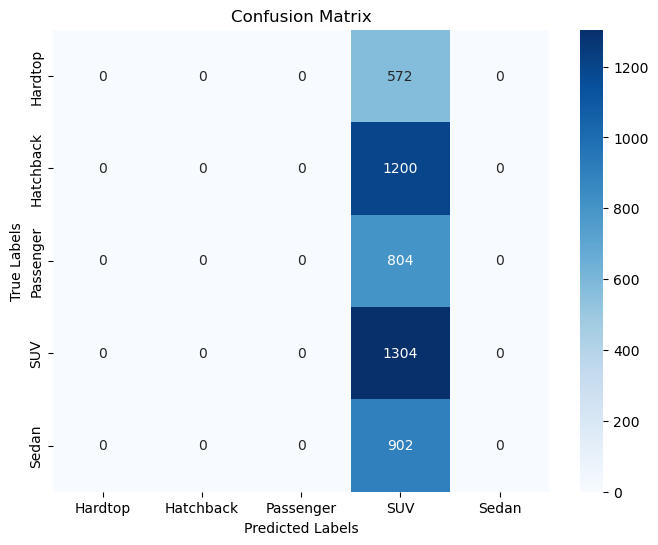

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_body_style.classes_,
            yticklabels=le_body_style.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#### Conclusion:

The model created with only 1 input feature 'Gender' can only produce 1 outcome of the body style 'SUV'. Hence, the model needs to use other features to produce more accurate results.